## Image Classification Problem - Artificial Neural Networks Vs Convolutional Neural Networks

* Study Basics of Artificial Neural Networks and Convolutional Neural Networks first

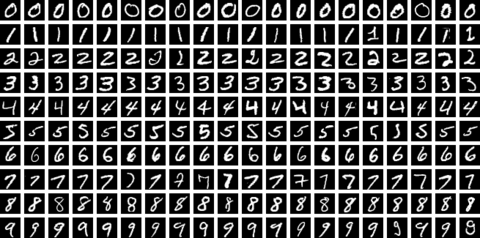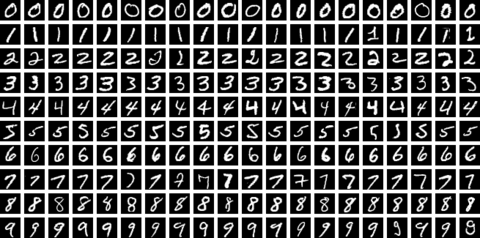

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
print(f"Length of X_train - {len(X_train)}")
print(f"Length of X_test - {len(X_test)}")

Length of X_train - 60000
Length of X_test - 10000


In [47]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### The MNIST dataset contains grayscale images where each pixel has an intensity value between 0 and 255.

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
X_test.shape

(10000, 28, 28)

### Lets see how images are kept in the dataset using a simple function

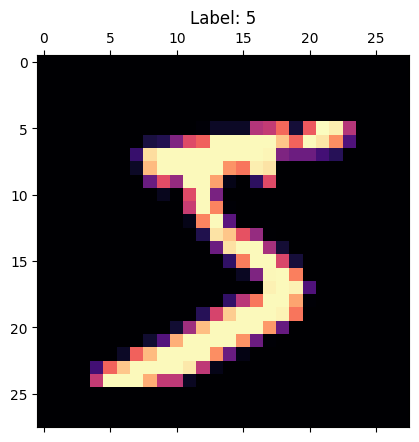

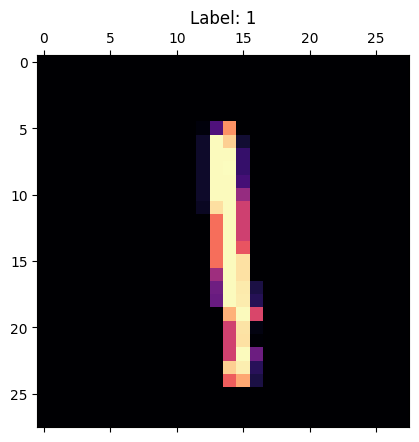

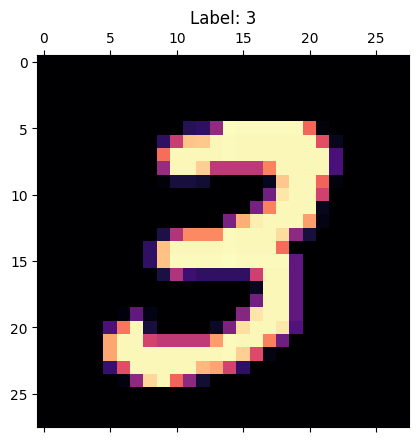

In [50]:
def show_example(X,y,index):
    plt.matshow(X[index], cmap='magma')
    plt.title(f"Label: {y[index]}")
    plt.show()

show_example(X_train,y_train,0)
show_example(X_train,y_train,8)
show_example(X_train,y_train,7)

### A simple Artificial Neural Network

### Normalize the data

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Why do we need to normalize the data?
The MNIST dataset contains grayscale images where each pixel has an intensity value between 0 and 255 as we saw above - Dividing by 255 scales the pixel values to a range of [0, 1] and Neural networks perform better when the input features are scaled to a similar range, especially between 0 and 1 or -1 and 1. This prevents large gradients during training and ensures faster convergence. The normalized value is much smaller, allowing the network weights to process it efficiently.

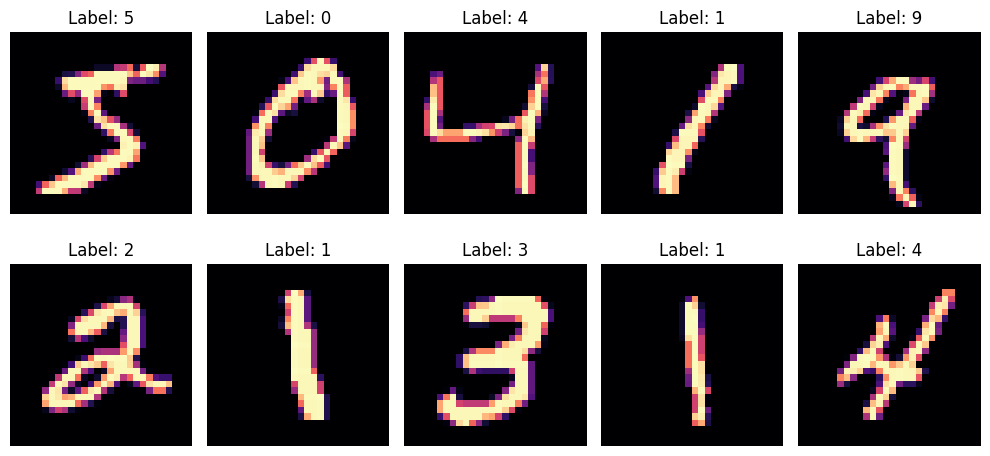

In [53]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='magma')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [54]:
# Suppressing the User Warning (Optional)
import warnings
warnings.filterwarnings('ignore')

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to 1D
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') 
])

In [55]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8619 - loss: 0.4731 - val_accuracy: 0.9616 - val_loss: 0.1315
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9683 - loss: 0.1093 - val_accuracy: 0.9691 - val_loss: 0.1013
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9782 - loss: 0.0704 - val_accuracy: 0.9732 - val_loss: 0.0889
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9834 - loss: 0.0531 - val_accuracy: 0.9693 - val_loss: 0.1054
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9738 - val_loss: 0.0927
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9730 - val_loss: 0.0967
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9747 - val_loss: 0.0970
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9936 - loss: 0.0194 - 

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9699 - loss: 0.1236
Test Loss: 0.09776514023542404
Test Accuracy: 0.9757000207901001


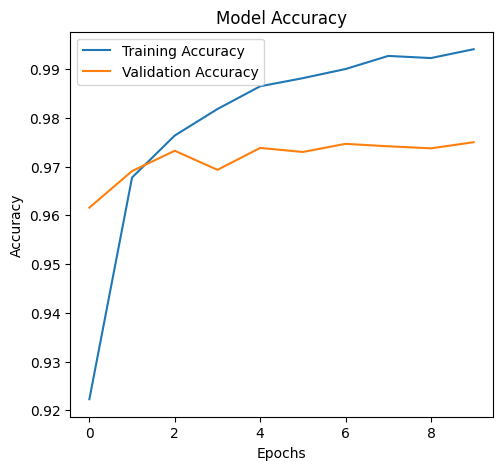

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

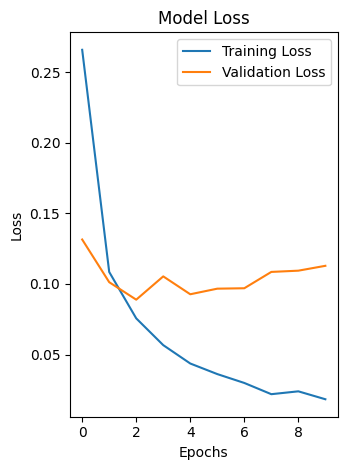

In [59]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### A simple Artificial Neural Network was designed above, achieving test accuracy of 0.97..

#### Implementation of Convolutional Neural Network at - "Convolutional Neural Network MNIST" in my github repository - 
https://github.com/Handa1810/Deep-Learning-Journey

#### Key notings/ General Doubts -

Difference between "sparse_categorical_crossentropy" and "categorical_crossentropy"
* Both are used for Multiclass classification problems !!

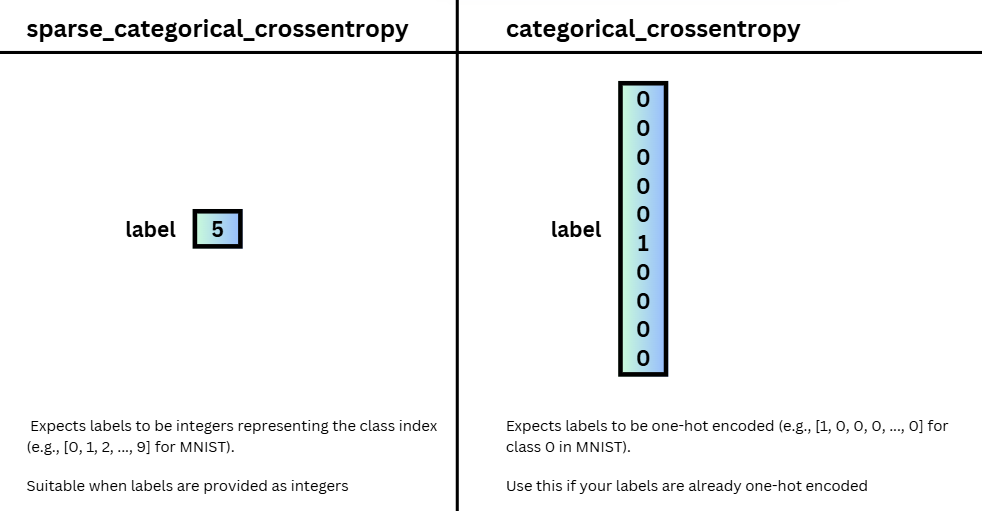